<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imbalance Techniques Experiment**

**Choose Imbalance Techniques**
1. Resampling Methods:
  * Oversampling
    * SMOTE
    * ADASYN
  * Undersampling
    * Tomek links
    * Near Miss

2. Ensemble Techniques:
  * Random Forest
  * Boosting algorithms

3. Algorithm-specific Methods
  * XGBoost
  * LightGBM

In [1]:
# Load the libraries

import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import psutil
import os

# Warning filter

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Preprocessing

from sklearn.preprocessing import LabelEncoder

# Algorithmns models

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
import lightgbm as lgb

# Ensemble Methods

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Class imbalance

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.utils import resample

# Plot Theme

sns.set_theme(style="darkgrid")
plt.style.use("ggplot")

**Load Data**

In [2]:
data = pd.read_csv("KNN Imputation Dataset.csv")

**Label Encode, Drop null from target var, and Convert data to Int**

In [3]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# make small letters
data['country'] = data['country'].apply(lambda x: x.lower() if isinstance(x, str) else x)

# Fit and transform the countries data
data["country"] = label_encoder.fit_transform(data['country'])

data = data.dropna()

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('int64')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 3268
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             2189 non-null   int64
 1   no_employees              2189 non-null   int64
 2   tech_company              2189 non-null   int64
 3   company_role              2189 non-null   int64
 4   benefits                  2189 non-null   int64
 5   care_options              2189 non-null   int64
 6   wellness_program          2189 non-null   int64
 7   seek_help                 2189 non-null   int64
 8   anonymity                 2189 non-null   int64
 9   leave                     2189 non-null   int64
 10  mental_importance         2189 non-null   int64
 11  neg_consequence_coworker  2189 non-null   int64
 12  discuss_mh                2189 non-null   int64
 13  work_interfere            2189 non-null   int64
 14  coworkers                 2189 non-null 

In [5]:
data.shape

(2189, 25)

## **Split Dataset**

In [6]:
X = data.drop(["mental_health_diagnosed"], axis=1)
y = data['mental_health_diagnosed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

## **Baseline Model**

In [7]:
# Define a list of classifiers
classifiers = {
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [8]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.3f}".format(metrics["Accuracy"]))
    print("Precision: {:.3f}".format(metrics["Precision"]))
    print("Recall: {:.3f}".format(metrics["Recall"]))
    print("F1 Score: {:.3f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.3f}".format(metrics["ROC AUC"]))
    print("Kappa: {:.3f}".format(metrics["Kappa"]))
    print("Geometric Mean: {:.3f}".format(metrics["Geometric Mean"]))
    print("Balanced Accuracy: {:.3f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.662
Precision: 0.662
Recall: 1.000
F1 Score: 0.797
ROC AUC: 0.500
Kappa: 0.000
Geometric Mean: 0.000
Balanced Accuracy: 0.500
Confusion Matrix:
[[  0 148]
 [  0 290]]


--- Naive Bayes ---
Accuracy: 0.868
Precision: 0.920
Recall: 0.876
F1 Score: 0.898
ROC AUC: 0.864
Kappa: 0.711
Geometric Mean: 0.864
Balanced Accuracy: 0.864
Confusion Matrix:
[[126  22]
 [ 36 254]]


--- Decision Tree ---
Accuracy: 0.870
Precision: 0.915
Recall: 0.886
F1 Score: 0.900
ROC AUC: 0.862
Kappa: 0.713
Geometric Mean: 0.862
Balanced Accuracy: 0.862
Confusion Matrix:
[[124  24]
 [ 33 257]]


--- Logistic Regression ---
Accuracy: 0.895
Precision: 0.891
Recall: 0.959
F1 Score: 0.924
ROC AUC: 0.864
Kappa: 0.756
Geometric Mean: 0.859
Balanced Accuracy: 0.864
Confusion Matrix:
[[114  34]
 [ 12 278]]




## **Apply Imbalance Techniques**

**Explore the class distribution**

In [9]:
class_counts = data['mental_health_diagnosed'].value_counts()
print(class_counts)

1    1449
0     740
Name: mental_health_diagnosed, dtype: int64


**Visualize the class distribution**

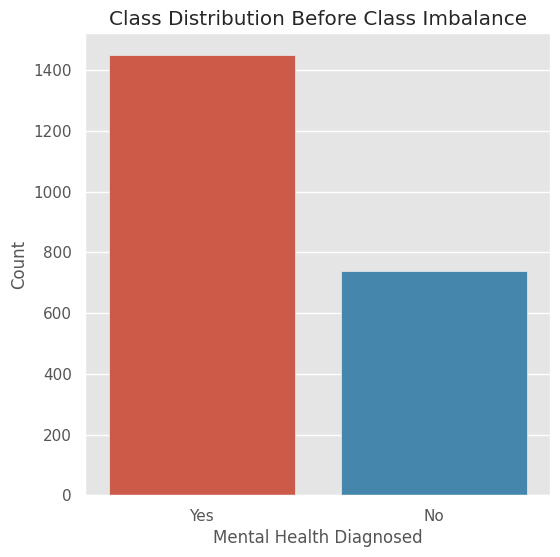

In [10]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0: 'No', 1: 'Yes'}
new_data['mh_label'] = new_data['mental_health_diagnosed'].map(mh_mapping)

plt.figure(figsize=(6, 6))
# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='mh_label')
plt.xlabel('Mental Health Diagnosed')
plt.ylabel('Count')
plt.title('Class Distribution Before Class Imbalance')
plt.show()

### **Resampling Methods**

##### **1. Synthetic Minority Over-sampling Technique (SMOTE)**

In [11]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

smote_counts = y_train_resampled.value_counts()
print(smote_counts)

1    1159
0    1159
Name: mental_health_diagnosed, dtype: int64


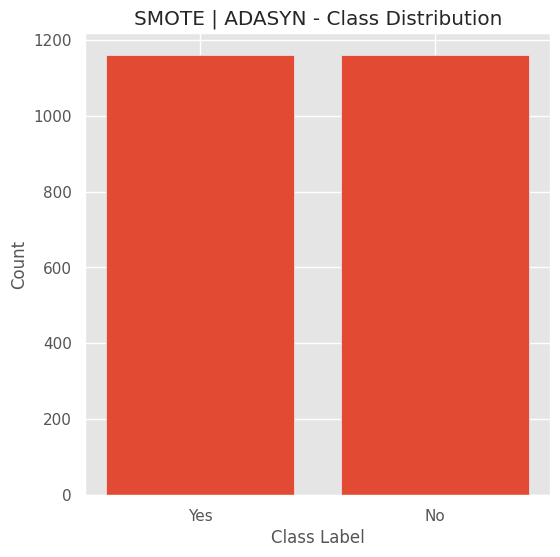

In [12]:
smote_counts.index = smote_counts.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(6, 6))
plt.bar(smote_counts.index, smote_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('SMOTE | ADASYN - Class Distribution')
plt.show()

In [13]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.3f}".format(metrics["Accuracy"]))
    print("Precision: {:.3f}".format(metrics["Precision"]))
    print("Recall: {:.3f}".format(metrics["Recall"]))
    print("F1 Score: {:.3f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.3f}".format(metrics["ROC AUC"]))
    print("Kappa: {:.3f}".format(metrics["Kappa"]))
    print("Geometric Mean: {:.3f}".format(metrics["Geometric Mean"]))
    print("Balanced Accuracy: {:.3f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.769
Precision: 0.827
Recall: 0.824
F1 Score: 0.826
ROC AUC: 0.743
Kappa: 0.485
Geometric Mean: 0.739
Balanced Accuracy: 0.743
Confusion Matrix:
[[ 98  50]
 [ 51 239]]


--- Naive Bayes ---
Accuracy: 0.870
Precision: 0.918
Recall: 0.883
F1 Score: 0.900
ROC AUC: 0.864
Kappa: 0.714
Geometric Mean: 0.863
Balanced Accuracy: 0.864
Confusion Matrix:
[[125  23]
 [ 34 256]]


--- Decision Tree ---
Accuracy: 0.865
Precision: 0.914
Recall: 0.879
F1 Score: 0.896
ROC AUC: 0.859
Kappa: 0.704
Geometric Mean: 0.858
Balanced Accuracy: 0.859
Confusion Matrix:
[[124  24]
 [ 35 255]]


--- Logistic Regression ---
Accuracy: 0.893
Precision: 0.896
Recall: 0.948
F1 Score: 0.921
ROC AUC: 0.866
Kappa: 0.753
Geometric Mean: 0.862
Balanced Accuracy: 0.866
Confusion Matrix:
[[116  32]
 [ 15 275]]




##### **2. Adaptive Synthetic  (ADASYN)**

In [14]:
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

adasyn_counts = y_train_resampled.value_counts()
print(adasyn_counts)

1    1159
0    1152
Name: mental_health_diagnosed, dtype: int64


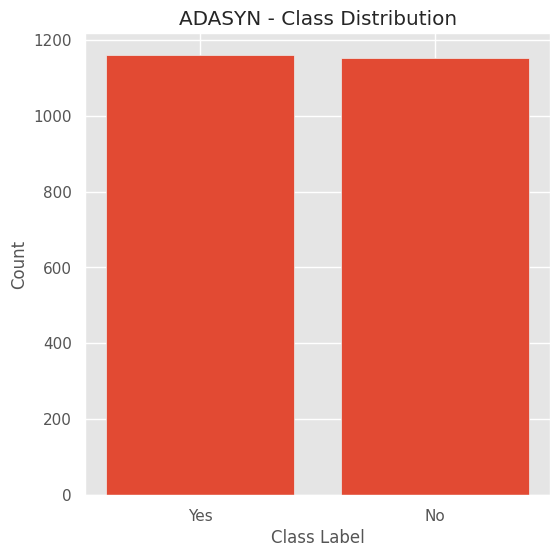

In [15]:
adasyn_counts.index = adasyn_counts.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(6, 6))
plt.bar(adasyn_counts.index, adasyn_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('ADASYN - Class Distribution')
plt.xticks(adasyn_counts.index)
plt.show()

In [16]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.3f}".format(metrics["Accuracy"]))
    print("Precision: {:.3f}".format(metrics["Precision"]))
    print("Recall: {:.3f}".format(metrics["Recall"]))
    print("F1 Score: {:.3f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.3f}".format(metrics["ROC AUC"]))
    print("Kappa: {:.3f}".format(metrics["Kappa"]))
    print("Geometric Mean: {:.3f}".format(metrics["Geometric Mean"]))
    print("Balanced Accuracy: {:.3f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.776
Precision: 0.818
Recall: 0.852
F1 Score: 0.834
ROC AUC: 0.740
Kappa: 0.490
Geometric Mean: 0.732
Balanced Accuracy: 0.740
Confusion Matrix:
[[ 93  55]
 [ 43 247]]


--- Naive Bayes ---
Accuracy: 0.865
Precision: 0.923
Recall: 0.869
F1 Score: 0.895
ROC AUC: 0.864
Kappa: 0.707
Geometric Mean: 0.864
Balanced Accuracy: 0.864
Confusion Matrix:
[[127  21]
 [ 38 252]]


--- Decision Tree ---
Accuracy: 0.888
Precision: 0.929
Recall: 0.900
F1 Score: 0.914
ROC AUC: 0.882
Kappa: 0.754
Geometric Mean: 0.882
Balanced Accuracy: 0.882
Confusion Matrix:
[[128  20]
 [ 29 261]]


--- Logistic Regression ---
Accuracy: 0.890
Precision: 0.888
Recall: 0.955
F1 Score: 0.920
ROC AUC: 0.859
Kappa: 0.746
Geometric Mean: 0.854
Balanced Accuracy: 0.859
Confusion Matrix:
[[113  35]
 [ 13 277]]




##### **Tomek Links Under Sampling (TLUS)**

In [17]:
tl = TomekLinks()
X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)

tl_counts = y_train_resampled.value_counts()
print(tl_counts)

1    1087
0     592
Name: mental_health_diagnosed, dtype: int64


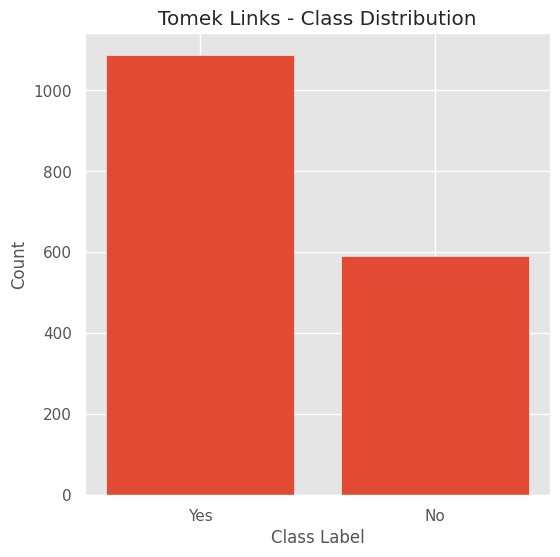

In [18]:
tl_counts.index = tl_counts.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(6, 6))
plt.bar(tl_counts.index, tl_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Tomek Links - Class Distribution')
plt.show()

In [19]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.3f}".format(metrics["Accuracy"]))
    print("Precision: {:.3f}".format(metrics["Precision"]))
    print("Recall: {:.3f}".format(metrics["Recall"]))
    print("F1 Score: {:.3f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.3f}".format(metrics["ROC AUC"]))
    print("Kappa: {:.3f}".format(metrics["Kappa"]))
    print("Geometric Mean: {:.3f}".format(metrics["Geometric Mean"]))
    print("Balanced Accuracy: {:.3f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.696
Precision: 0.686
Recall: 0.997
F1 Score: 0.813
ROC AUC: 0.552
Kappa: 0.134
Geometric Mean: 0.328
Balanced Accuracy: 0.552
Confusion Matrix:
[[ 16 132]
 [  1 289]]


--- Naive Bayes ---
Accuracy: 0.863
Precision: 0.920
Recall: 0.869
F1 Score: 0.894
ROC AUC: 0.860
Kappa: 0.702
Geometric Mean: 0.860
Balanced Accuracy: 0.860
Confusion Matrix:
[[126  22]
 [ 38 252]]


--- Decision Tree ---
Accuracy: 0.863
Precision: 0.897
Recall: 0.897
F1 Score: 0.897
ROC AUC: 0.847
Kappa: 0.694
Geometric Mean: 0.845
Balanced Accuracy: 0.847
Confusion Matrix:
[[118  30]
 [ 30 260]]


--- Logistic Regression ---
Accuracy: 0.895
Precision: 0.894
Recall: 0.955
F1 Score: 0.923
ROC AUC: 0.866
Kappa: 0.757
Geometric Mean: 0.862
Balanced Accuracy: 0.866
Confusion Matrix:
[[115  33]
 [ 13 277]]




##### **Near Miss Under Sampling (NMUS)**

In [20]:
nm = NearMiss()
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)

nm_counts = y_train_resampled.value_counts()
print(nm_counts)

0    592
1    592
Name: mental_health_diagnosed, dtype: int64


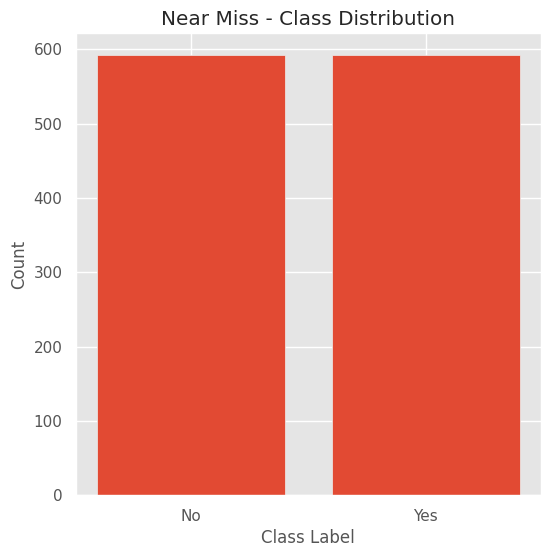

In [21]:
nm_counts.index = nm_counts.index.map({1: 'Yes', 0: 'No'})

plt.figure(figsize=(6, 6))
plt.bar(nm_counts.index, nm_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Near Miss - Class Distribution')
plt.show()

In [22]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.3f}".format(metrics["Accuracy"]))
    print("Precision: {:.3f}".format(metrics["Precision"]))
    print("Recall: {:.3f}".format(metrics["Recall"]))
    print("F1 Score: {:.3f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.3f}".format(metrics["ROC AUC"]))
    print("Kappa: {:.3f}".format(metrics["Kappa"]))
    print("Geometric Mean: {:.3f}".format(metrics["Geometric Mean"]))
    print("Balanced Accuracy: {:.3f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Support Vector Machine ---
Accuracy: 0.687
Precision: 0.733
Recall: 0.831
F1 Score: 0.779
ROC AUC: 0.618
Kappa: 0.253
Geometric Mean: 0.580
Balanced Accuracy: 0.618
Confusion Matrix:
[[ 60  88]
 [ 49 241]]


--- Naive Bayes ---
Accuracy: 0.813
Precision: 0.941
Recall: 0.766
F1 Score: 0.844
ROC AUC: 0.835
Kappa: 0.616
Geometric Mean: 0.833
Balanced Accuracy: 0.835
Confusion Matrix:
[[134  14]
 [ 68 222]]


--- Decision Tree ---
Accuracy: 0.801
Precision: 0.911
Recall: 0.776
F1 Score: 0.838
ROC AUC: 0.814
Kappa: 0.586
Geometric Mean: 0.813
Balanced Accuracy: 0.814
Confusion Matrix:
[[126  22]
 [ 65 225]]


--- Logistic Regression ---
Accuracy: 0.845
Precision: 0.908
Recall: 0.852
F1 Score: 0.879
ROC AUC: 0.841
Kappa: 0.663
Geometric Mean: 0.841
Balanced Accuracy: 0.841
Confusion Matrix:
[[123  25]
 [ 43 247]]




### **Ensemble Techniques**

1. **Random Forest**

*Ensemble methods like Random Forest are indeed effective in handling class imbalance because they combine multiple weak learners (decision trees) to create a robust and accurate model. The inherent nature of Random Forest helps in addressing the class imbalance problem by reducing the risk of overfitting to the majority class and improving generalization to the minority class.*

2. **Boosting Algorithms**

*Boosting algorithms are powerful ensemble methods that can handle class imbalance effectively by giving more emphasis to misclassified instances and focusing on difficult-to-classify samples.  One popular boosting algorithm is AdaBoost (Adaptive Boosting).*

**Random Forest handles class imbalance effectively because of the following reasons:**

1. **Bootstrap Aggregating (Bagging):** Random Forest uses bagging, which means it creates multiple subsets of the training data with replacement. This helps in increasing the representation of the minority class in some of the subsets, making the classifier more robust to imbalanced data.

2. **Feature Randomness:** Random Forest selects a random subset of features to split at each node of the decision trees. This randomness further helps in reducing the dominance of the majority class and can improve the overall performance on the minority class.

3. **Voting Ensemble:** In the testing phase, the ensemble of decision trees in the Random Forest votes on the final classification. Since each decision tree in the forest may have learned from different subsets of data, it provides a more balanced voting mechanism.

4. **Out-of-Bag (OOB) Samples:** Random Forest can also use out-of-bag samples (samples not used during training) to estimate the performance of the model. This helps in getting an unbiased estimate of the model's performance even with imbalanced data.

By combining these mechanisms, Random Forest is well-suited for class imbalance problems and can produce reliable and accurate predictions even in the presence of imbalanced classes.

**AdaBoost handles class imbalance effectively due to the following reasons:**

1. **Weighted Voting:** In AdaBoost, each weak learner (typically decision trees) is assigned a weight based on its accuracy in classifying the training data. Misclassified instances are given higher weights, making subsequent weak learners focus more on correcting those errors.

2. **Iterative Learning:** AdaBoost iteratively trains weak learners, and at each iteration, it gives more attention to misclassified instances from the previous iteration. This way, difficult-to-classify samples receive more emphasis during the learning process.

3. **Ensemble Aggregation:** The final prediction in AdaBoost is made by aggregating the predictions of all weak learners, with more weight given to the ones with better performance on the training data. This ensemble aggregation further helps in handling class imbalance and producing more accurate predictions.

4. **Robustness:** By iteratively adapting to the difficult samples, AdaBoost becomes more robust to imbalanced classes over the course of iterations.

Overall, AdaBoost can effectively handle class imbalance by focusing on misclassified instances and adapting to the challenges posed by imbalanced data. It often outperforms traditional classifiers when dealing with skewed class distributions.

In [23]:
# Define a list of Ensemble classifiers
EnsembleClassifiers = {
    "Adaptive Boosting": AdaBoostClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

In [24]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in EnsembleClassifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.3f}".format(metrics["Accuracy"]))
    print("Precision: {:.3f}".format(metrics["Precision"]))
    print("Recall: {:.3f}".format(metrics["Recall"]))
    print("F1 Score: {:.3f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.3f}".format(metrics["ROC AUC"]))
    print("Kappa: {:.3f}".format(metrics["Kappa"]))
    print("Geometric Mean: {:.3f}".format(metrics["Geometric Mean"]))
    print("Balanced Accuracy: {:.3f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Adaptive Boosting ---
Accuracy: 0.909
Precision: 0.917
Recall: 0.948
F1 Score: 0.932
ROC AUC: 0.890
Kappa: 0.792
Geometric Mean: 0.888
Balanced Accuracy: 0.890
Confusion Matrix:
[[123  25]
 [ 15 275]]


--- Random Forest ---
Accuracy: 0.909
Precision: 0.903
Recall: 0.966
F1 Score: 0.933
ROC AUC: 0.881
Kappa: 0.789
Geometric Mean: 0.877
Balanced Accuracy: 0.881
Confusion Matrix:
[[118  30]
 [ 10 280]]




### **Algorithm-specific Methods**

XGBoost (Extreme Gradient Boosting) is another powerful boosting algorithm that has specific parameters and techniques to handle class imbalance effectively. XGBoost is an enhanced version of Gradient Boosting that leverages a variety of regularization techniques and can handle class imbalance naturally.

We used XGBoost in algorithm specific methods because it had specific parameters or techniques to handle class imbalance.



**XGBoost can handle class imbalance effectively due to the following reasons:**

**scale_pos_weight:** The scale_pos_weight parameter helps in handling class imbalance by assigning higher weights to the minority class during the boosting process. This parameter helps in balancing the effect of class distribution and prevents the model from being biased towards the majority class.

**Regularization:** XGBoost uses L1 and L2 regularization to prevent overfitting, which can be beneficial when dealing with imbalanced data as it reduces the risk of overfitting to the majority class.

**Gradient-based Optimization:** XGBoost employs gradient-based optimization techniques, which allows it to prioritize difficult-to-classify samples during the boosting process, thus making it more robust to imbalanced classes.

Overall, XGBoost is an excellent choice for handling class imbalance, as it provides built-in mechanisms to deal with skewed class distributions while delivering high performance and accurate predictions.

In [25]:
# Create and set up the XGBoost classifier
# You can use scale_pos_weight to handle class imbalance by assigning higher weights to the minority class
# The scale_pos_weight should be set as the ratio of the number of negative (majority) class samples to positive (minority) class samples

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Create and set up the LightGBM classifier
# You can use the is_unbalance parameter to handle class imbalance by automatically setting the positive (minority) class weight


AlgorithmSpecific = {
    "XGBoost": XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42),
    "LightGBM": lgb.LGBMClassifier(is_unbalance=True, random_state=42)
}

In [26]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in AlgorithmSpecific.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.3f}".format(metrics["Accuracy"]))
    print("Precision: {:.3f}".format(metrics["Precision"]))
    print("Recall: {:.3f}".format(metrics["Recall"]))
    print("F1 Score: {:.3f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.3f}".format(metrics["ROC AUC"]))
    print("Kappa: {:.3f}".format(metrics["Kappa"]))
    print("Geometric Mean: {:.3f}".format(metrics["Geometric Mean"]))
    print("Balanced Accuracy: {:.3f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- XGBoost ---
Accuracy: 0.909
Precision: 0.919
Recall: 0.945
F1 Score: 0.932
ROC AUC: 0.891
Kappa: 0.793
Geometric Mean: 0.890
Balanced Accuracy: 0.891
Confusion Matrix:
[[124  24]
 [ 16 274]]


--- LightGBM ---
Accuracy: 0.902
Precision: 0.910
Recall: 0.945
F1 Score: 0.927
ROC AUC: 0.881
Kappa: 0.777
Geometric Mean: 0.879
Balanced Accuracy: 0.881
Confusion Matrix:
[[121  27]
 [ 16 274]]


